# How well do jobs and skills pay for Data Analysts?

### Methodology
1. Evaluate Median Salary for top 6 Data Jobs
2. Find Median Salary per skill for Data Analysts
3. Visualize for Hihgest Paying Skills and most Demanded Skills

In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Creating a U.S. Data Frame
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [ ]:
# Creating a Job Titles List based on highest count to use as a filter for Top 6 Data Frame
job_titles = df_US['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [ ]:
# Creating Top 6 Data Frame
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [ ]:
# Creating a Job Order to pass into seaborn plot to have the order the way we would like it
# based on highest to lowest median
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

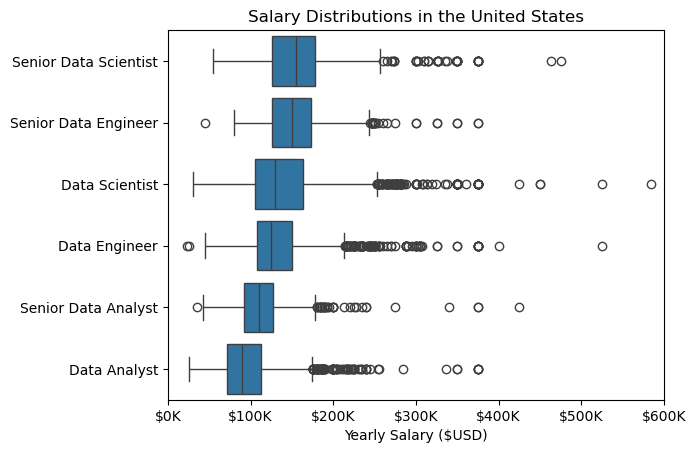

In [ ]:
# Creating box plots for Median Salaries of the Top 6 Roles
sns.boxplot(data=df_US_top6, x='salary_year_avg', y="job_title_short", order=job_order)

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()